# Visualizing Geospatial Data

```{contents}
:local:
:depth: 2
```

## Introduction

## Technical requirements

```bash
conda create -n gee python
conda activate gee
conda install -c conda-forge mamba
mamba install -c conda-forge pygis
```

```bash
jupyter lab
```

In [ ]:
# %pip install pygis

In [1]:
import ee
import geemap

In [2]:
geemap.ee_initialize()

## Using the plotting tool

In [3]:
Map = geemap.Map(center=[40, -100], zoom=4)

landsat7 = ee.Image('LANDSAT/LE7_TOA_5YEAR/1999_2003').select(
    ['B1', 'B2', 'B3', 'B4', 'B5', 'B7']
)

landsat_vis = {'bands': ['B4', 'B3', 'B2'], 'gamma': 1.4}
Map.addLayer(landsat7, landsat_vis, "Landsat")

## Hyperion es imagen hiperespectral con más de 200 bandas
hyperion = ee.ImageCollection('EO1/HYPERION').filter(
    ee.Filter.date('2016-01-01', '2017-03-01')
)

hyperion_vis = {
    'min': 1000.0,
    'max': 14000.0,
    'gamma': 2.5,
}
Map.addLayer(hyperion, hyperion_vis, 'Hyperion')
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

In [6]:
## Esto lo que va a hacer es permitir que sea visible el puntero que marcamos para ver la firma espectral
## Con overlay superponemos las firmas espectrales para comparar en dos puntos
Map.set_plot_options(add_marker_cluster=True, overlay=True)

In [7]:
## Esta función permite extraer las firmas espectrales en cada punto. Se le pasa un .csv
Map.extract_values_to_points('prueba.csv')

The csv file has been saved to: c:\Users\skype\VS-python-codes\practicas-GEE\prueba.csv


In [ ]:
# y si quiesiese añadir de nuevo los puntos, se puede a partir de datos csv
Map.add_points_from_xy('prueba.csv')

## Changing layer opacity

In [20]:
Map = geemap.Map(center=(40, -100), zoom=4)

dem = ee.Image('USGS/SRTMGL1_003')
states = ee.FeatureCollection("TIGER/2018/States")

vis_params = {
    'min': 0,
    'max': 4000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}

Map.addLayer(dem, vis_params, 'SRTM DEM', True, 1)
Map.addLayer(states, {}, "US States", True)

Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

Los cambios de opacidad o el hecho de eliminar capas en geempa, se pueden realizar de forma interactiva (a través del visor) pero también de forma programática. A continuación ejemplos de como eliminar una determinada capa 

In [11]:
# Con este comando se pueden ver todas las capas que tiene el mapa
Map.layers

(TileLayer(attribution='&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors', base=True, max_zoom=19, min_zoom=1, name='OpenStreetMap.Mapnik', options=['attribution', 'bounds', 'detect_retina', 'max_native_zoom', 'max_zoom', 'min_native_zoom', 'min_zoom', 'no_wrap', 'tile_size', 'tms', 'zoom_offset'], url='https://tile.openstreetmap.org/{z}/{x}/{y}.png'),
 EELeafletTileLayer(attribution='Google Earth Engine', max_zoom=24, name='SRTM DEM', options=['attribution', 'bounds', 'detect_retina', 'max_native_zoom', 'max_zoom', 'min_native_zoom', 'min_zoom', 'no_wrap', 'tile_size', 'tms', 'zoom_offset'], url='https://earthengine.googleapis.com/v1/projects/earthengine-legacy/maps/82302bf76471cbc4d71eafdc4e3c615a-891b924d08f5730ec96f0aa1e128e553/tiles/{z}/{x}/{y}'),
 EELeafletTileLayer(attribution='Google Earth Engine', max_zoom=24, name='US States', options=['attribution', 'bounds', 'detect_retina', 'max_native_zoom', 'max_zoom', 'min_native_zoom', 'min_zoom',

In [13]:
Map.layers = Map.layers[:-1]

In [17]:
# Aquí le esta cambiando la opacidad al último layer establecido
Map.layers[-1].opacity = 0.5

In [19]:
layer = Map.find_layer('SRTM DEM') # Busca el layer por nombre
Map.remove_layer(layer) # Elimina

## Visualizing raster data

### Single-band images

In [ ]:
Map = geemap.Map(center=[12, 69], zoom=3)
dem = ee.Image('USGS/SRTMGL1_003')
vis_params = {
    'min': 0,
    'max': 4000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}
Map.addLayer(dem, vis_params, 'SRTM DEM')
Map

In [ ]:
vis_params = {
    'bands': ['elevation'],
    'palette': ['333399', ' 00b2b2', ' 99eb85', ' ccbe7d', ' 997c76', ' ffffff'],
    'min': 0.0,
    'max': 6000.0,
    'opacity': 1.0,
    'gamma': 1.0,
}

### Multi-band images

In [ ]:
Map = geemap.Map()
landsat7 = ee.Image('LANDSAT/LE7_TOA_5YEAR/1999_2003')
vis_params = {
    'min': 20,
    'max': 200,
    'gamma': 2,
    'bands': ['B4', 'B3', 'B2'],
}
Map.addLayer(landsat7, vis_params, 'Landsat 7')
Map

## Visualizing vector data

In [ ]:
Map = geemap.Map()
states = ee.FeatureCollection("TIGER/2018/States")
Map.addLayer(states, {}, "US States")
Map

In [ ]:
vis_params = {
    'color': 'ff0000ff',
    'width': 2,
    'lineType': 'solid',
    'fillColor': '00000000',
}

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)
states = ee.FeatureCollection("TIGER/2018/States")
Map.addLayer(states.style(**vis_params), {}, "US States")
Map

## Creating legends

### Built-in legends

In [21]:
## Visto anteriormente -> son leyendas ya creadas que se pueden importar de los principales dataset globales
from geemap.legends import builtin_legends

for legend in builtin_legends:
    print(legend)

NLCD
ESA_WorldCover
ESRI_LandCover
ESRI_LandCover_TS
Dynamic_World
NWI
MODIS/051/MCD12Q1
MODIS/006/MCD12Q1
GLOBCOVER
JAXA/PALSAR
Oxford
AAFC/ACI
COPERNICUS/CORINE/V20/100m
COPERNICUS/Landcover/100m/Proba-V/Global
USDA/NASS/CDL
ALOS_landforms


In [22]:
Map.add_legend(builtin_legend='NLCD')

In [23]:
Map = geemap.Map(center=[40, -100], zoom=4)
Map.add_basemap('HYBRID')

nlcd = ee.Image('USGS/NLCD_RELEASES/2019_REL/NLCD/2019')
landcover = nlcd.select('landcover')

Map.addLayer(landcover, {}, 'NLCD Land Cover 2019')
Map.add_legend(
    title="NLCD Land Cover Classification", builtin_legend='NLCD', height='465px'
)
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

### Custom legends

In [24]:
Map = geemap.Map(add_google_map=False)

labels = ['One', 'Two', 'Three', 'Four', 'etc']

# colors can be defined using either hex code or RGB (0-255, 0-255, 0-255)
colors = ['#8DD3C7', '#FFFFB3', '#BEBADA', '#FB8072', '#80B1D3']
# legend_colors = [(255, 0, 0), (127, 255, 0), (127, 18, 25), (36, 70, 180), (96, 68 123)]

Map.add_legend(labels=labels, colors=colors, position='bottomright')
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [25]:
Map = geemap.Map(center=[40, -100], zoom=4)

legend_dict = {
    '11 Open Water': '466b9f',
    '12 Perennial Ice/Snow': 'd1def8',
    '21 Developed, Open Space': 'dec5c5',
    '22 Developed, Low Intensity': 'd99282',
    '23 Developed, Medium Intensity': 'eb0000',
    '24 Developed High Intensity': 'ab0000',
    '31 Barren Land (Rock/Sand/Clay)': 'b3ac9f',
    '41 Deciduous Forest': '68ab5f',
    '42 Evergreen Forest': '1c5f2c',
    '43 Mixed Forest': 'b5c58f',
    '51 Dwarf Scrub': 'af963c',
    '52 Shrub/Scrub': 'ccb879',
    '71 Grassland/Herbaceous': 'dfdfc2',
    '72 Sedge/Herbaceous': 'd1d182',
    '73 Lichens': 'a3cc51',
    '74 Moss': '82ba9e',
    '81 Pasture/Hay': 'dcd939',
    '82 Cultivated Crops': 'ab6c28',
    '90 Woody Wetlands': 'b8d9eb',
    '95 Emergent Herbaceous Wetlands': '6c9fb8',
}

nlcd = ee.Image('USGS/NLCD_RELEASES/2019_REL/NLCD/2019')
landcover = nlcd.select('landcover')

Map.addLayer(landcover, {}, 'NLCD Land Cover 2019')
Map.add_legend(title="NLCD Land Cover Classification", legend_dict=legend_dict)
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

### Earth Engine class table

En esta fase explica que para crear leyendas personalizadas también se le puede pasar una tabla como la que aparece en el código de abajo. Para obtener esa tabla la forma más sencilla si queremos copiar una existente en el Catalog es ir directamente allí y copiar y pegar la que aparece en los desplegables con control c y control+v. En el video copia y pega y se mantiene ese formato  

In [ ]:
Map = geemap.Map()

dataset = ee.ImageCollection("ESA/WorldCover/v100").first()
Map.addLayer(dataset, {'bands': ['Map']}, "Landcover")

ee_class_table = """
Value	Color	Description
10	006400	Trees
20	ffbb22	Shrubland
30	ffff4c	Grassland
40	f096ff	Cropland
50	fa0000	Built-up
60	b4b4b4	Barren / sparse vegetation
70	f0f0f0	Snow and ice
80	0064c8	Open water
90	0096a0	Herbaceous wetland
95	00cf75	Mangroves
100	fae6a0	Moss and lichen
"""

legend_dict = geemap.legend_from_ee(ee_class_table)
Map.add_legend(title="ESA Land Cover", legend_dict=legend_dict)
Map

## Creating color bars

In [ ]:
Map = geemap.Map()
dem = ee.Image('USGS/SRTMGL1_003')
vis_params = {
    'min': 0,
    'max': 4000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}
Map.addLayer(dem, vis_params, 'SRTM DEM')
Map

In [ ]:
Map.add_colorbar(vis_params, label="Elevation (m)", layer_name="SRTM DEM")
Map

In [ ]:
Map.add_colorbar(
    vis_params, label="Elevation (m)", layer_name="SRTM DEM", orientation="vertical"
)

In [ ]:
Map.add_colorbar(
    vis_params,
    label="Elevation (m)",
    layer_name="SRTM DEM",
    orientation="vertical",
    transparent_bg=True,
)

## Displaying labels

GEE no está pensado como tal para crear composiciones cartográficas estéticas, pero se pueden ñadir algunas cosas como etiquetas --> no demasiado "estético" porque las etiquetas ni siquiera se adaptan al reducir y ampliar el tamaño

In [27]:
Map = geemap.Map(center=[40, -100], zoom=4, add_google_map=False)
states = ee.FeatureCollection("TIGER/2018/States")
style = {'color': 'black', 'fillColor': "00000000"}
Map.addLayer(states.style(**style), {}, "US States")
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

In [28]:
Map.add_labels(
    data=states,
    column="STUSPS",
    font_size="12pt",
    font_color="blue",
    font_family="arial",
    font_weight="bold",
    draggable=True,
)

In [29]:
Map.remove_labels()

In [32]:
## aquí explica un poco como es el proceso para añadir las etiquetas en GEE map, se necesita calcular el
# centroide y demás -> por eso también es poco práctico
centroids = geemap.vector_centroids(states)
df = geemap.ee_to_df(centroids)
# df

In [31]:
Map.add_labels(
    data=df,
    column="STUSPS",
    font_size="12pt",
    font_color="blue",
    font_family="arial",
    font_weight="bold",
    x='longitude',
    y='latitude',
)
Map

Map(bottom=502.0, center=[35.74637293778451, 160.13254682692124], controls=(WidgetControl(options=['position',…

## Image overlay

In [33]:
Map = geemap.Map(center=(25, -115), zoom=5)
url = 'https://i.imgur.com/06Q1fSz.png'
image = geemap.ImageOverlay(url=url, bounds=((13, -130), (32, -100)))
Map.add_layer(image)
Map

Map(center=[25, -115], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

In [34]:
image.url = 'https://i.imgur.com/U0axit9.png'
Map

Map(bottom=3881.0, center=[22.065278067765835, -112.43408203125001], controls=(WidgetControl(options=['positio…

In [35]:
url = 'https://i.imgur.com/06Q1fSz.png'
filename = 'hurricane.png'
geemap.download_file(url, filename)

Downloading...
From: https://i.imgur.com/06Q1fSz.png
To: c:\Users\skype\VS-python-codes\practicas-GEE\hurricane.png
100%|██████████| 489k/489k [00:00<00:00, 6.33MB/s]


'c:\\Users\\skype\\VS-python-codes\\practicas-GEE\\hurricane.png'

In [36]:
Map = geemap.Map(center=(25, -115), zoom=5)
image = geemap.ImageOverlay(url=filename, bounds=((13, -130), (32, -100)))
Map.add_layer(image)
Map

Map(center=[25, -115], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

## Video overlay

In [41]:
Map = geemap.Map(center=(25, -115), zoom=5)
url = 'https://labs.mapbox.com/bites/00188/patricia_nasa.webm'
bounds = ((13, -130), (32, -100))
Map.video_overlay(url, bounds)
Map

Map(center=[25, -115], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

## Split-panel maps

Para crear un visor interactivo -> se peuden añadir Image Collection disponibles -> por ejemplo, podría ser interesante crear un visor comparativo del SIOSE a la izquierda y a la derecha el CORINE.

Unico problema ahora es que no se puede arrastrar (drag) el mapa -> solo zoom in zoom out

Si geemap da problemas puedes importar folium para la visualización --> hace import geemap.foliumap as geemap

In [45]:
# Si da problemas la viusalización o si quieres exportarlo a HTML quizas tenga menos fallos

# import geemap.foliumap as geemap

In [44]:
Map = geemap.Map()
Map.split_map(left_layer='NLCD 2019 CONUS Land Cover', right_layer='OpenTopoMap')
Map

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In [46]:
list(geemap.basemaps.keys())

['OpenStreetMap',
 'Esri.WorldStreetMap',
 'Esri.WorldImagery',
 'Esri.WorldTopoMap',
 'FWS NWI Wetlands',
 'FWS NWI Wetlands Raster',
 'NLCD 2021 CONUS Land Cover',
 'NLCD 2019 CONUS Land Cover',
 'NLCD 2016 CONUS Land Cover',
 'NLCD 2013 CONUS Land Cover',
 'NLCD 2011 CONUS Land Cover',
 'NLCD 2008 CONUS Land Cover',
 'NLCD 2006 CONUS Land Cover',
 'NLCD 2004 CONUS Land Cover',
 'NLCD 2001 CONUS Land Cover',
 'USGS NAIP Imagery',
 'USGS NAIP Imagery False Color',
 'USGS NAIP Imagery NDVI',
 'USGS Hydrography',
 'USGS 3DEP Elevation',
 'ESA Worldcover 2020',
 'ESA Worldcover 2020 S2 FCC',
 'ESA Worldcover 2020 S2 TCC',
 'ESA Worldcover 2021',
 'ESA Worldcover 2021 S2 FCC',
 'ESA Worldcover 2021 S2 TCC',
 'BasemapAT.basemap',
 'BasemapAT.grau',
 'BasemapAT.highdpi',
 'BasemapAT.orthofoto',
 'BasemapAT.overlay',
 'BasemapAT.surface',
 'BasemapAT.terrain',
 'CartoDB.DarkMatter',
 'CartoDB.DarkMatterNoLabels',
 'CartoDB.DarkMatterOnlyLabels',
 'CartoDB.Positron',
 'CartoDB.PositronNoLabel

In [47]:
Map = geemap.Map(center=(40, -100), zoom=4, height=600)

nlcd_2001 = ee.Image('USGS/NLCD_RELEASES/2019_REL/NLCD/2001').select('landcover')
nlcd_2019 = ee.Image('USGS/NLCD_RELEASES/2019_REL/NLCD/2019').select('landcover')

left_layer = geemap.ee_tile_layer(nlcd_2001, {}, 'NLCD 2001')
right_layer = geemap.ee_tile_layer(nlcd_2019, {}, 'NLCD 2019')

Map.split_map(left_layer, right_layer, add_close_button=True) ## esta es la linea que se tiene que añadir para hace el split map
Map

Map(center=[40, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

## Linked maps

In [ ]:
image = (
    ee.ImageCollection('COPERNICUS/S2')
    .filterDate('2018-09-01', '2018-09-30')
    .map(lambda img: img.divide(10000))
    .median()
)

vis_params = [
    {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 0.3, 'gamma': 1.3},
    {'bands': ['B8', 'B11', 'B4'], 'min': 0, 'max': 0.3, 'gamma': 1.3},
    {'bands': ['B8', 'B4', 'B3'], 'min': 0, 'max': 0.3, 'gamma': 1.3},
    {'bands': ['B12', 'B12', 'B4'], 'min': 0, 'max': 0.3, 'gamma': 1.3},
]

labels = [
    'Natural Color (B4/B3/B2)',
    'Land/Water (B8/B11/B4)',
    'Color Infrared (B8/B4/B3)',
    'Vegetation (B12/B11/B4)',
]

geemap.linked_maps(
    rows=2,
    cols=2,
    height="300px",
    center=[38.4151, 21.2712],
    zoom=12,
    ee_objects=[image],
    vis_params=vis_params,
    labels=labels,
    label_position="topright",
)

## Timeseries inspector

### Visualizing image collections

## Este se podría decir que es el **METODO 1** para visualizar series temporales

El sistem:index hace referencia al nombre de la columna que contiene la fecha de las imágenes. Es como por ejemplo una hoja de excel, donde consultamos la fecha de nacimiento de un grupo. 

Que es lo que realmente hace la función aggregate_array() --> documenctación oficial pone esto "Agrega sobre una propiedad dada de los objetos de una colección, calculando una lista de todos los valores de la propiedad seleccionada." (https://developers.google.com/earth-engine/apidocs/ee-imagecollection-aggregate_array) --> devuelve una lista con todos los atributos en esa categoria basicamente -> en este caso todas las fechas

In [4]:
Map = geemap.Map(center=[40, -100], zoom=4)
collection = ee.ImageCollection('USGS/NLCD_RELEASES/2019_REL/NLCD').select('landcover')
vis_params = {'bands': ['landcover']}
years = collection.aggregate_array('system:index').getInfo()
years

['2001', '2004', '2006', '2008', '2011', '2013', '2016', '2019']

In [6]:
## Por ejemplo para contar cuantos valores usamos aggregate_count -> nos indica que hay 8
## porque son 8 fechas disponibles
collection.aggregate_count('system:index').getInfo()

8

In [9]:
## Para que veas donde se encuentra system:index en una imagen
collection.first()

In [13]:
# A Lansat 8 TOA image collection for a specific year and location.
col = ee.ImageCollection("LANDSAT/LC08/C02/T1_TOA").filterBounds(
    ee.Geometry.Point([-122.073, 37.188])).filterDate('2018', '2019')

# An image property of interest, percent cloud cover in this case.
prop = 'CLOUD_COVER'

# Use ee.ImageCollection.aggregate_* functions to fetch information about
# values of a selected property across all images in the collection. For
# example, produce a list of all values, get counts, and calculate statistics.
print('List of property values:', col.aggregate_array(prop).getInfo()) ## Nos esta creando una lista 
print('Count of property values:', col.aggregate_count(prop).getInfo())
print('Count of distinct property values:',
      col.aggregate_count_distinct(prop).getInfo())
print('First collection element property value:',
      col.aggregate_first(prop).getInfo())
print('Histogram of property values:')
print(col.aggregate_histogram(prop).getInfo())
print('Min of property values:', col.aggregate_min(prop).getInfo())
print('Max of property values:', col.aggregate_max(prop).getInfo())

# The following methods are applicable to numerical properties only.
print('Mean of property values:',
      col.aggregate_mean(prop).getInfo())
print('Sum of property values:',
      col.aggregate_sum(prop).getInfo())
print('Product of property values:',
      col.aggregate_product(prop).getInfo())
print('Std dev (sample) of property values:',
      col.aggregate_sample_sd(prop).getInfo())
print('Variance (sample) of property values:',
      col.aggregate_sample_var(prop).getInfo())
print('Std dev (total) of property values:',
      col.aggregate_total_sd(prop).getInfo())
print('Variance (total) of property values:',
      col.aggregate_total_var(prop).getInfo())
print('Summary stats of property values:')
print(col.aggregate_stats(prop).getInfo() )

List of property values: [92.85, 0.41, 0.03, 0.07, 0.06, 54.24, 55, 0.09, 52.18, 35.74, 36.42, 29.31, 42.19, 44.96, 31.6, 0.13, 68.58, 0.07, 46.33, 74.58, 33.51]
Count of property values: 21
Count of distinct property values: 20
First collection element property value: 92.85
Histogram of property values:
{'0.03': 1, '0.06': 1, '0.07': 2, '0.09': 1, '0.13': 1, '0.41': 1, '29.31': 1, '31.6': 1, '33.51': 1, '35.74': 1, '36.42': 1, '42.19': 1, '44.96': 1, '46.33': 1, '52.18': 1, '54.24': 1, '55.0': 1, '68.58': 1, '74.58': 1, '92.85': 1}
Min of property values: 0.03
Max of property values: 92.85
Mean of property values: 33.254761904761914
Sum of property values: 698.3500000000001
Product of property values: 11104434922442034
Std dev (sample) of property values: 28.182597931888314
Variance (sample) of property values: 794.2588261904755
Std dev (total) of property values: 27.503399377608986
Variance (total) of property values: 756.4369773242624
Summary stats of property values:
{'max': 92.85,

In [14]:
Map = geemap.Map(center=[40, -100], zoom=4)
collection = ee.ImageCollection('USGS/NLCD_RELEASES/2019_REL/NLCD').select('landcover')
vis_params = {'bands': ['landcover']}
years = collection.aggregate_array('system:index').getInfo()
years

['2001', '2004', '2006', '2008', '2011', '2013', '2016', '2019']

In [15]:
## Función ts_inspector para visualizar cualquier time series
## Logicamente es necesario que el numero de imagenes sea igual al numero de fechas
Map.ts_inspector(
    left_ts=collection,
    right_ts=collection,
    left_names=years,
    right_names=years,
    left_vis=vis_params,
    right_vis=vis_params,
    width='80px',
)
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Dropdown(layout=…

### Visualizing planet.com imagery

In [ ]:
import os

os.environ["PLANET_API_KEY"] = "your-api-key"

In [ ]:
monthly_tiles = geemap.planet_monthly_tiles()
geemap.ts_inspector(monthly_tiles)

In [ ]:
quarterly_tiles = geemap.planet_quarterly_tiles()
geemap.ts_inspector(quarterly_tiles)

In [ ]:
tiles = geemap.planet_tiles()
geemap.ts_inspector(tiles)

In [ ]:
Map = geemap.Map()
Map

## Time slider

### Visualizing vegetation data

## Este se podría decir que es el **METODO 2** para visualizar series temporales --> add_time_slider()

Doc oficial = https://geemap.org/geemap/#geemap.geemap.Map.add_time_slider

In [19]:
Map = geemap.Map()

collection = (
    ee.ImageCollection('MODIS/MCD43A4_006_NDVI') # Datos MODIS de NDVI
    .filter(ee.Filter.date('2018-06-01', '2018-07-01'))
    .select("NDVI")
)

# Configura parametros de visualizacion
vis_params = {
    'min': 0.0,
    'max': 1.0,
    'palette': 'ndvi',
}

Map.add_time_slider(collection, vis_params, time_interval=2)
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [20]:
Map = geemap.Map()

collection = (
    ee.ImageCollection('MODIS/MCD43A4_006_NDVI') # Datos MODIS de NDVI
    .filter(ee.Filter.date('2018-06-01', '2018-07-01'))
    .select("NDVI")
)

# Configura parametros de visualizacion
vis_params = {
    'min': 0.0,
    'max': 1.0,
    'palette': 'ndvi',
}

Map.add_time_slider(collection, vis_params, time_interval=2)
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

### Visualizing weather data

GFS: Global Forecast System 384-Hour Predicted Atmosphere Data (https://developers.google.com/earth-engine/datasets/catalog/NOAA_GFS0P25)

In [21]:
Map = geemap.Map()

# Utiliza datos de temperatura del NOAA
collection = (
    ee.ImageCollection('NOAA/GFS0P25')
    .filterDate('2018-12-22', '2018-12-23')
    .limit(24) # Una para cada hora -> timeseries de 24 horas
    .select('temperature_2m_above_ground') # selecciona la banda de temperatura
)

vis_params = {
    'min': -40.0,
    'max': 35.0,
    'palette': ['blue', 'purple', 'cyan', 'green', 'yellow', 'red'],
}

labels = [str(n).zfill(2) + ":00" for n in range(0, 24)] ## añade el :00 de los minutos a la etiqueta
# z_fill lo que hace es rellenar con digitos ej.zfill(2) -> 4 -> 04 y zfill(4) -> 4 -> 0004
Map.add_time_slider(collection, vis_params, labels=labels, time_interval=1, opacity=0.8)
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

### Visualizing Sentinel-2 imagery

In [23]:
## Hace un time series de imagenes Sentinel 
Map = geemap.Map(center=[37.75, -122.45], zoom=12)

collection = (
    ee.ImageCollection('COPERNICUS/S2_SR')
    .filterBounds(ee.Geometry.Point([-122.45, 37.75]))
    .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 10)
)

vis_params = {"min": 0, "max": 4000, "bands": ["B8", "B4", "B3"]}

Map.add_time_slider(collection, vis_params)
Map

Map(center=[37.75, -122.45], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchData…

## Shaded relief maps

In [24]:
import geemap.colormaps as cm

Map = geemap.Map()

dem = ee.Image("USGS/SRTMGL1_003")
hillshade = ee.Terrain.hillshade(dem)

vis = {'min': 0, 'max': 6000, 'palette': cm.palettes.terrain}
blend = geemap.blend(top_layer=dem, top_vis=vis)

Map.addLayer(hillshade, {}, 'Hillshade')
Map.addLayer(blend, {}, 'Shaded relief')

Map.add_colorbar(vis, label='Elevation (m)')
Map.setCenter(91.4206, 27.3225, zoom=9)
Map

Map(center=[27.3225, 91.4206], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDa…

In [25]:
left_layer = geemap.ee_tile_layer(blend, {}, "Shaded relief")
right_layer = geemap.ee_tile_layer(hillshade, {}, "Hillshade")
Map.split_map(left_layer, right_layer)

In [26]:
Map = geemap.Map()
nlcd = ee.Image("USGS/NLCD_RELEASES/2019_REL/NLCD/2019").select('landcover')
nlcd_vis = {'bands': ['landcover']}
blend = geemap.blend(nlcd, dem, top_vis=nlcd_vis, expression='a*b')
Map.addLayer(blend, {}, 'Blend NLCD')
Map.add_legend(builtin_legend='NLCD', title='NLCD Land Cover')
Map.setCenter(-118.1310, 35.6816, 10)
Map

Map(center=[35.6816, -118.131], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchD…

## Elevation contours

In [27]:
import geemap.colormaps as cm

In [28]:
Map = geemap.Map()
image = ee.Image("USGS/SRTMGL1_003")
hillshade = ee.Terrain.hillshade(image)
Map.addLayer(hillshade, {}, "Hillshade")
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [29]:
vis_params = {'min': 0, "max": 5000, "palette": cm.palettes.dem}
Map.addLayer(image, vis_params, "dem", True, 0.5)
Map.add_colorbar(vis_params, label='Elevation (m)')

In [30]:
contours = geemap.create_contours(image, 0, 5000, 100, region=None)
Map.addLayer(contours, {'palette': 'black'}, 'contours')
Map.setCenter(-119.3678, 37.1671, 12)

## Visualizing NetCDF data

In [31]:
url = 'https://github.com/gee-community/geemap/raw/master/examples/data/wind_global.nc'
filename = 'wind_global.nc'
geemap.download_file(url, output=filename)

Downloading...
From: https://github.com/gee-community/geemap/raw/master/examples/data/wind_global.nc
To: c:\Users\skype\VS-python-codes\practicas-GEE\gee\wind_global.nc
100%|██████████| 1.05M/1.05M [00:00<00:00, 6.34MB/s]


'c:\\Users\\skype\\VS-python-codes\\practicas-GEE\\gee\\wind_global.nc'

In [32]:
data = geemap.read_netcdf(filename)
data

<xarray.Dataset> Size: 1MB
Dimensions:  (lat: 181, lon: 360)
Coordinates:
  * lat      (lat) float64 1kB 90.0 89.0 88.0 87.0 ... -87.0 -88.0 -89.0 -90.0
  * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Data variables:
    u_wind   (lat, lon) float64 521kB ...
    v_wind   (lat, lon) float64 521kB ...
Attributes:
    centerName:      US National Weather Service - NCEP(WMC)
    disciplineName:  Meteorological products
    refTime:         2016-04-30T06:00:00.000Z

In [ ]:
Map = geemap.Map(layers_control=True)
Map.add_netcdf(
    filename,
    variables=['v_wind'],
    palette='coolwarm',
    shift_lon=True,
    layer_name='v_wind',
)

geojson = (
    'https://github.com/gee-community/geemap/raw/master/examples/data/countries.geojson'
)
Map.add_geojson(geojson, layer_name='Countries')
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

[2024-04-02 17:14:06,049] ERROR in app: Exception on /api/tiles/2/2/1.png [GET]
Traceback (most recent call last):
  File "c:\Users\skype\anaconda3\envs\gee\lib\site-packages\rio_tiler\io\base.py", line 94, in tile_exists
    tile_bounds = transform_bounds(
  File "c:\Users\skype\anaconda3\envs\gee\lib\site-packages\rasterio\warp.py", line 148, in transform_bounds
    dst_crs = CRS.from_user_input(dst_crs)
  File "rasterio\\crs.pyx", line 783, in rasterio.crs.CRS.from_user_input
rasterio.errors.CRSError: CRS is invalid: None

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\skype\anaconda3\envs\gee\lib\site-packages\flask\app.py", line 1484, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\Users\skype\anaconda3\envs\gee\lib\site-packages\flask\app.py", line 1469, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "c:\Users\skype\anaconda3\envs

In [34]:
Map = geemap.Map(layers_control=True)
Map.add_basemap('CartoDB.DarkMatter')
Map.add_velocity(filename, zonal_speed='u_wind', meridional_speed='v_wind')
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

## Visualizing LiDAR data

In [35]:
%pip install "geemap[lidar]"

     ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
     - -------------------------------------- 0.1/1.6 MB 1.1 MB/s eta 0:00:02
     ---------- ----------------------------- 0.4/1.6 MB 4.2 MB/s eta 0:00:01
     ------------------------ --------------- 1.0/1.6 MB 6.7 MB/s eta 0:00:01
     -------------------------------------- - 1.5/1.6 MB 8.0 MB/s eta 0:00:01
     ---------------------------------------- 1.6/1.6 MB 7.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ------ --------------------------------- 0.5/2.9 MB 9.4 MB/s eta 0:00:01
   ------------ --------------------------- 1.0/2.9 MB 10.0 MB/s

In [36]:
import os

url = (
    'https://drive.google.com/file/d/1H_X1190vL63BoFYa_cVBDxtIa8rG-Usb/view?usp=sharing'
)
filename = 'madison.las'

if not os.path.exists(filename):
    geemap.download_file(url, 'madison.zip', unzip=True)

Downloading...
From (original): https://drive.google.com/uc?id=1H_X1190vL63BoFYa_cVBDxtIa8rG-Usb
From (redirected): https://drive.google.com/uc?id=1H_X1190vL63BoFYa_cVBDxtIa8rG-Usb&confirm=t&uuid=e0e97c89-13e3-4315-b0e4-5a9bc04251f6
To: c:\Users\skype\VS-python-codes\practicas-GEE\gee\madison.zip
100%|██████████| 54.7M/54.7M [00:04<00:00, 11.2MB/s]


Extracting files...


In [37]:
las = geemap.read_lidar(filename)

In [38]:
las.header

<LasHeader(1.3, <PointFormat(1, 0 bytes of extra dims)>)>

In [39]:
las.header.point_count

4068294

In [40]:
list(las.point_format.dimension_names)

['X',
 'Y',
 'Z',
 'intensity',
 'return_number',
 'number_of_returns',
 'scan_direction_flag',
 'edge_of_flight_line',
 'classification',
 'synthetic',
 'key_point',
 'withheld',
 'scan_angle_rank',
 'user_data',
 'point_source_id',
 'gps_time']

In [41]:
las.X

array([5324343, 5324296, 5323993, ..., 5784049, 5784359, 5784667])

In [42]:
las.intensity

array([ 9, 41, 24, ..., 87, 80, 95], dtype=uint16)

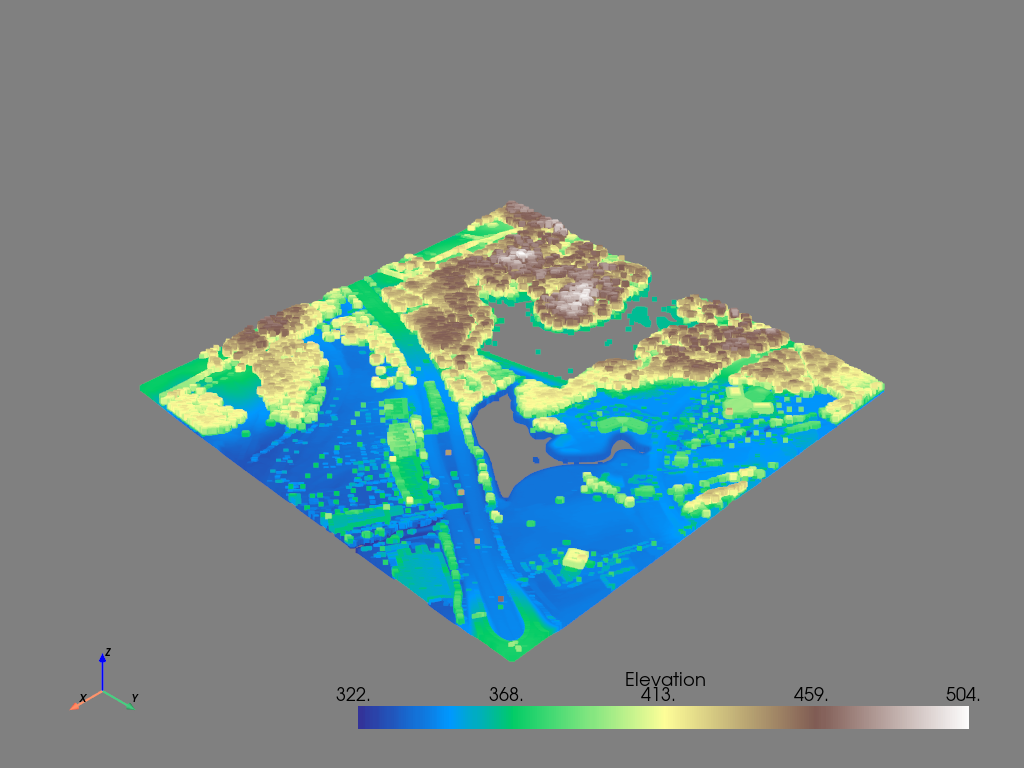

In [43]:
geemap.view_lidar(filename, cmap='terrain', backend='pyvista', background='gray')

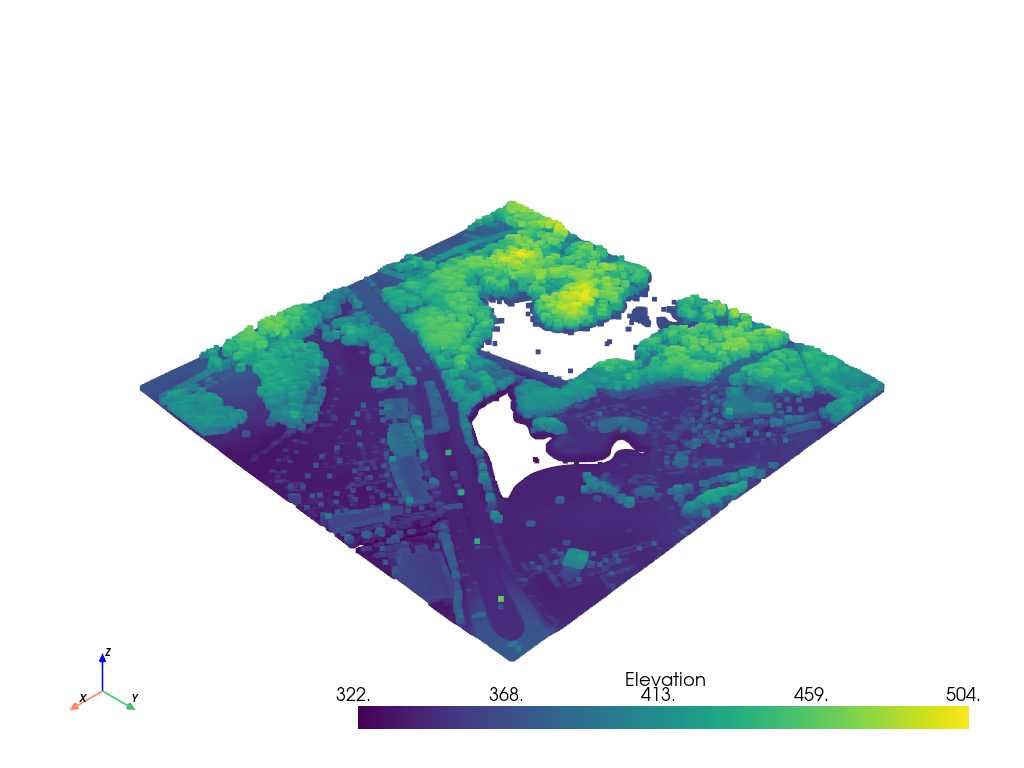

In [44]:
geemap.view_lidar(filename, backend='ipygany', background='white')

## Visualizing raster data in 3D

In [45]:
url = 'https://github.com/giswqs/data/raw/main/raster/srtm90.tif'
image = 'srtm90.tif'
if not os.path.exists(image):
    geemap.download_file(url, image)

Downloading...
From: https://github.com/giswqs/data/raw/main/raster/srtm90.tif
To: c:\Users\skype\VS-python-codes\practicas-GEE\gee\srtm90.tif
100%|██████████| 16.6M/16.6M [00:01<00:00, 10.9MB/s]


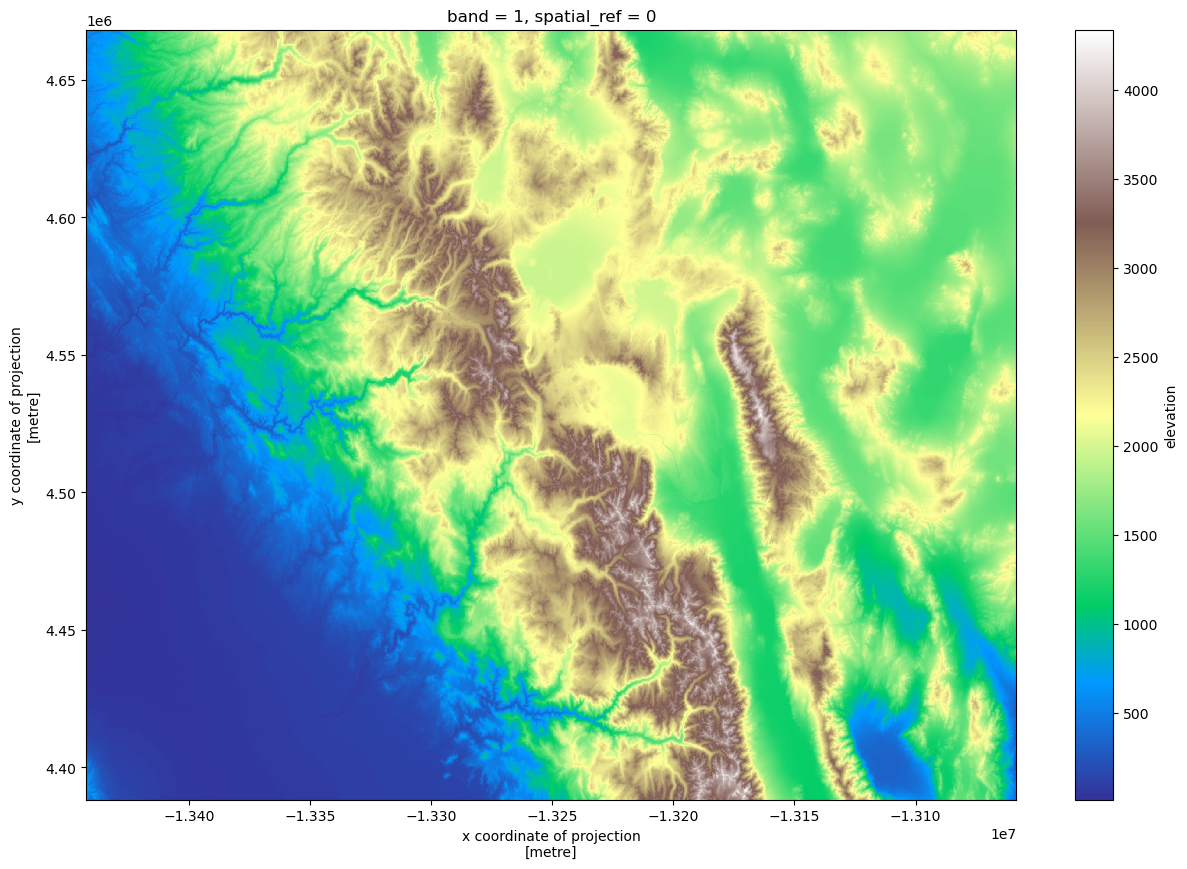

In [46]:
geemap.plot_raster(image, cmap='terrain', figsize=(15, 10))

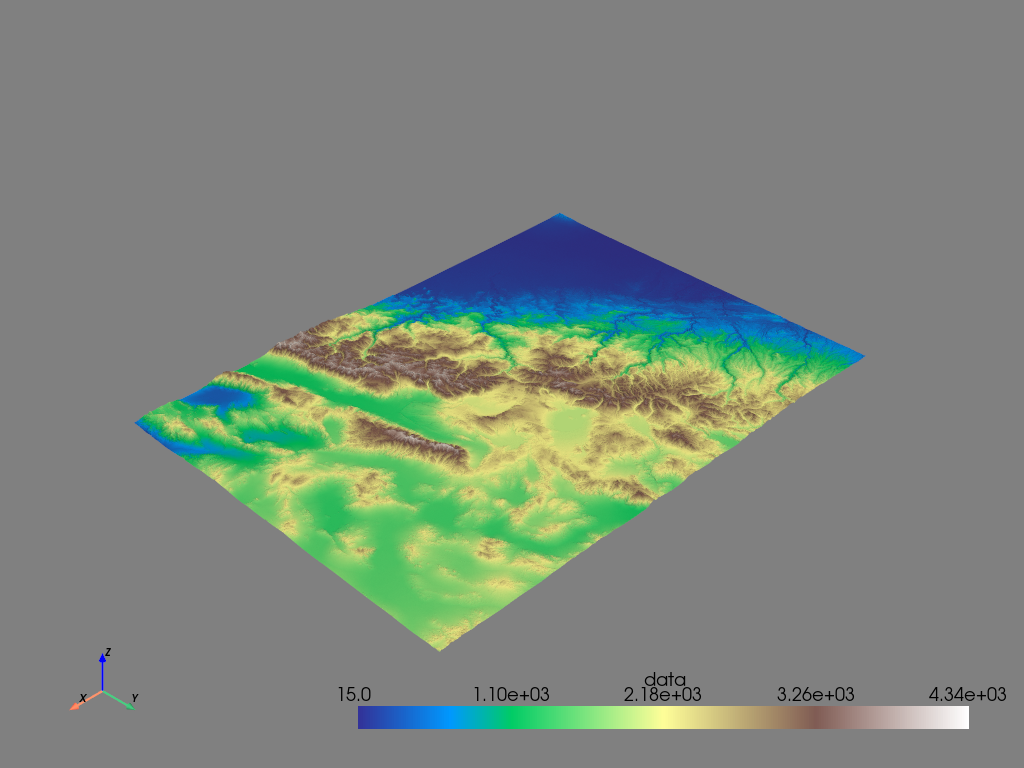

In [47]:
geemap.plot_raster_3d('srtm90.tif', factor=2, cmap='terrain', background='gray')

## Creating choropleth maps

In [ ]:
data = geemap.examples.datasets.countries_geojson

In [ ]:
Map = geemap.Map()
Map.add_data(
    data, column='POP_EST', scheme='Quantiles', cmap='Blues', legend_title='Population'
)
Map

In [ ]:
Map = geemap.Map()
Map.add_data(
    data,
    column='POP_EST',
    scheme='EqualInterval',
    cmap='Blues',
    legend_title='Population',
)
Map

In [ ]:
Map = geemap.Map()
Map.add_data(
    data,
    column='POP_EST',
    scheme='FisherJenks',
    cmap='Blues',
    legend_title='Population',
)
Map

In [ ]:
Map = geemap.Map()
Map.add_data(
    data,
    column='POP_EST',
    scheme='JenksCaspall',
    cmap='Blues',
    legend_title='Population',
)
Map

## Summary